In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


In [3]:
def plot_cum_fdr_two(targets, decoys, targets_and, decoys_and, names=['Target', "Decoy"], which='', frag_model='', title=""):
    import matplotlib as mpl

    plt.style.use(['ieee', "high-vis", 'no-latex'])
    plt.rcParams["font.family"] = "DejaVu Sans"
    plt.rcParams['svg.fonttype'] = 'none'

    fig, axs = plt.subplots(2, figsize=(4, 4), dpi=100)
    target_c = ['blue', 'green']
    for i in range(2):
        if i == 0:
            t_value = np.abs(targets)
            d_value = np.abs(decoys)
        else:
            t_value = np.abs(targets_and)
            d_value = np.abs(decoys_and)

        t_v, t_base = np.histogram(t_value, bins=1000)
        d_v, d_base = np.histogram(d_value, bins=1000)

        t_cum_sum = np.cumsum(t_v[::-1])[::-1] / len(t_value)
        d_cum_sum = np.cumsum(d_v[::-1])[::-1] / len(d_value)

        # prefix = "SA " if i == 0 else "Andromeda "
        axs[i].plot(t_base[:-1], t_cum_sum, label=names[0], linestyle='-')
        axs[i].plot(d_base[:-1], d_cum_sum, label=names[1], linestyle="--")
        # axs[i].set_xlim((0, max(d_base[:-1])))
        axs[i].set_ylim((0, 1))
        # axs[i].set_xscale("log")
        axs[i].invert_xaxis()
        axs[i].xaxis.grid(linestyle='--')
    axs[1].legend(loc="upper center", bbox_to_anchor=(0.5, 1),
                  fancybox=True, ncol=5, prop={'size': 10}, framealpha=0.8, frameon=False)
    axs[0].set_xlabel("Spectral angle", fontsize=10)
    axs[1].set_xlabel("Andromeda", fontsize=10)
    axs[0].set_title(title, fontsize=10)
    # axs[1].set_ylabel('Cumulative Distribution', fontsize=10)
    fig.text(-0.04, 0.5, 'Target/Decoy Cumulative Distribution',
             va='center', rotation='vertical', fontsize=10)
    plt.tight_layout()
    fig.savefig(
        f"fig/fig1-cumulative-{frag_model}-{which}.svg", dpi=300, bbox_inches="tight")
    mpl.rcParams.update(mpl.rcParamsDefault)


In [4]:
def plot_cum_fdr_two_decoy_max(targets, decoys, targets_and, decoys_and, names=['Target', "Decoy"], which='', frag_model='', title=""):
    import matplotlib as mpl

    plt.style.use(['ieee', "high-vis", 'no-latex'])
    plt.rcParams["font.family"] = "DejaVu Sans"
    plt.rcParams['svg.fonttype'] = 'none'

    fig, axs = plt.subplots(2, figsize=(4, 4), dpi=100)
    target_c = ['blue', 'green']
    for i in range(2):
        if i == 0:
            t_value = np.abs(targets)
            d_value = np.abs(decoys)
        else:
            t_value = np.abs(targets_and)
            d_value = np.abs(decoys_and)

        t_v, t_base = np.histogram(t_value, bins=1000)
        d_v, d_base = np.histogram(d_value, bins=1000)

        t_cum_sum = np.cumsum(t_v[::-1])[::-1] / len(t_value)
        d_cum_sum = np.cumsum(d_v[::-1])[::-1] / len(d_value)

        # prefix = "SA " if i == 0 else "Andromeda "
        axs[i].plot(t_base[:-1], t_cum_sum, label=names[0], linestyle='-')
        axs[i].plot(d_base[:-1], d_cum_sum, label=names[1], linestyle="--")
        axs[i].set_xlim((0, max(d_base[:-1])))
        axs[i].set_ylim((0, 1))
        # axs[i].set_xscale("log")
        axs[i].invert_xaxis()
        axs[i].xaxis.grid(linestyle='--')
    axs[1].legend(loc="upper center", bbox_to_anchor=(0.5, 1),
                  fancybox=True, ncol=5, prop={'size': 10}, framealpha=0.8, frameon=False)
    axs[0].set_xlabel("Spectral angle", fontsize=10)
    axs[1].set_xlabel("Andromeda", fontsize=10)
    axs[0].set_title(title, fontsize=10)
    # axs[1].set_ylabel('Cumulative Distribution', fontsize=10)
    fig.text(-0.04, 0.5, 'Target/Decoy Cumulative Distribution',
             va='center', rotation='vertical', fontsize=10)
    plt.tight_layout()
    fig.savefig(
        f"fig/fig1-cumulative-{frag_model}-{which}.svg", dpi=300, bbox_inches="tight")
    mpl.rcParams.update(mpl.rcParamsDefault)

def plot_cum_fdr_two_top(targets, decoys, targets_and, decoys_and, names=['Target', "Decoy"], which='', frag_model='', title="", ratio=0.001):
    import matplotlib as mpl

    plt.style.use(['ieee', "high-vis", 'no-latex'])
    plt.rcParams["font.family"] = "DejaVu Sans"
    plt.rcParams['svg.fonttype'] = 'none'

    fig, axs = plt.subplots(2, figsize=(4, 4), dpi=100)
    target_c = ['blue', 'green']
    for i in range(2):
        if i == 0:
            t_value = np.abs(targets)
            d_value = np.abs(decoys)
        else:
            t_value = np.abs(targets_and)
            d_value = np.abs(decoys_and)
        total_value = np.concatenate([t_value, d_value])
        print(total_value.shape, t_value.shape)
        start_value = np.sort(total_value)[-int(ratio*len(total_value))]

        t_v, t_base = np.histogram(t_value, bins=1000)
        d_v, d_base = np.histogram(d_value, bins=1000)

        t_cum_sum = np.cumsum(t_v[::-1])[::-1] / len(t_value)
        d_cum_sum = np.cumsum(d_v[::-1])[::-1] / len(d_value)

        # prefix = "SA " if i == 0 else "Andromeda "
        t_base = t_base[:-1]
        d_base = d_base[:-1]
        t_cum_sum = t_cum_sum[t_base < start_value]
        d_cum_sum = d_cum_sum[d_base < start_value]

        t_base = t_base[t_base < start_value]
        d_base = d_base[d_base < start_value]
        axs[i].plot(t_base, t_cum_sum, label=names[0], linestyle='-')
        axs[i].plot(d_base, d_cum_sum, label=names[1], linestyle="--")
        # axs[i].set_xlim((0, max(d_base[:-1])))
        axs[i].set_ylim((0, 1))
        # axs[i].set_xscale("log")
        axs[i].invert_xaxis()
        axs[i].xaxis.grid(linestyle='--')
    axs[1].legend(loc="upper center", bbox_to_anchor=(0.5, 1),
                  fancybox=True, ncol=5, prop={'size': 10}, framealpha=0.8, frameon=False)
    axs[0].set_xlabel("Spectral angle", fontsize=10)
    axs[1].set_xlabel("Andromeda", fontsize=10)
    axs[0].set_title(title, fontsize=10)
    # axs[1].set_ylabel('Cumulative Distribution', fontsize=10)
    fig.text(-0.04, 0.5, 'Target/Decoy Cumulative Distribution',
             va='center', rotation='vertical', fontsize=10)
    plt.tight_layout()
    fig.savefig(
        f"fig/fig1-cumulative-{frag_model}-{which}.svg", dpi=300, bbox_inches="tight")
    mpl.rcParams.update(mpl.rcParamsDefault)


trypsin
(663031,) (502736,)
(663031,) (502736,)
chymo
(921917,) (596067,)
(921917,) (596067,)
lysc
(714865,) (500689,)
(714865,) (500689,)
gluc
(774544,) (514496,)
(774544,) (514496,)


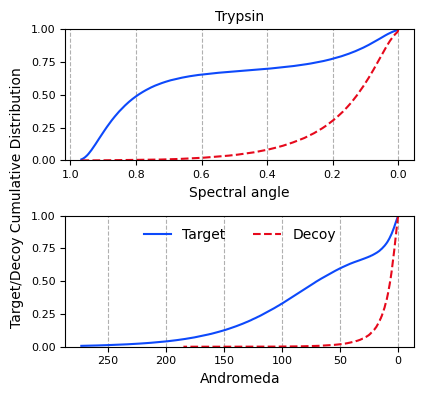

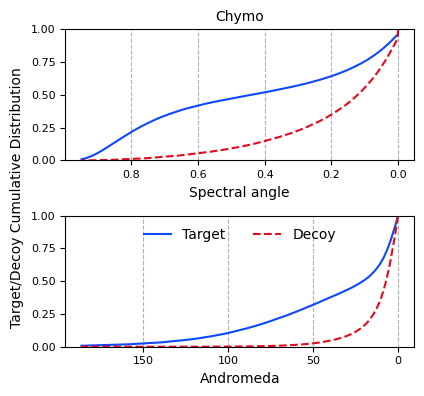

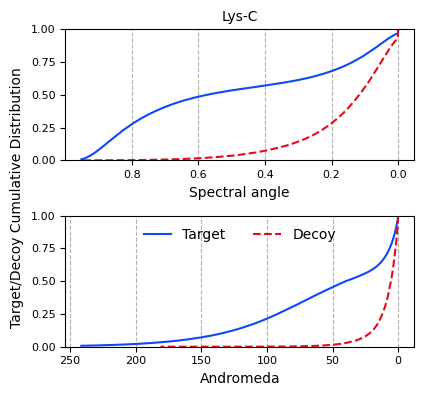

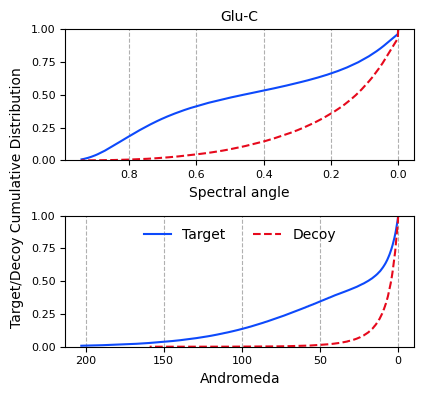

In [5]:
frag_model = "prosit_l1"

for which, show in zip(["trypsin", 'chymo', 'lysc', 'gluc'],
                       ["Trypsin", "Chymo", "Lys-C", "Glu-C"]):
    print(which)
    result_dir = f"/data/prosit/figs/fig235/{which}/percolator_up/try/{frag_model}"
    no_finetuned_dir = os.path.join(result_dir, "no_finetuned_twofold")
    sa_feat = pd.read_csv(os.path.join(
        no_finetuned_dir, "sa.tab"), sep='\t')
    andro_feat = pd.read_csv(os.path.join(
        no_finetuned_dir, "andromeda.tab"), sep='\t')
    plot_cum_fdr_two_top(sa_feat[sa_feat['Label'] == 1]['spectral_angle'],
                     sa_feat[sa_feat['Label'] == -1]['spectral_angle'],
                     andro_feat[andro_feat['Label']
                                == 1]['andromeda'],
                     andro_feat[andro_feat['Label']
                                == -1]['andromeda'],
                     which=which, frag_model=frag_model, title=show, ratio=0.005)
    

In [6]:
frag_model = "pdeep2"

for which, show in zip(["trypsin", 'chymo', 'lysc', 'gluc'],
                       ["Trypsin", "Chymo", "Lys-C", "Glu-C"]):
    print(which)
    result_dir = f"/data/prosit/figs/fig235/{which}/percolator_up/try/{frag_model}"
    no_finetuned_dir = os.path.join(result_dir, "no_finetuned_twofold")
    sa_feat = pd.read_csv(os.path.join(
        no_finetuned_dir, "sa.tab"), sep='\t')
    andro_feat = pd.read_csv(os.path.join(
        no_finetuned_dir, "andromeda.tab"), sep='\t')
    plot_cum_fdr_two(sa_feat[sa_feat['Label'] == 1]['spectral_angle'],
                     sa_feat[sa_feat['Label'] == -1]['spectral_angle'],
                     andro_feat[andro_feat['Label']
                                == 1]['andromeda'],
                     andro_feat[andro_feat['Label']
                                == -1]['andromeda'],
                     which=which, frag_model=frag_model, title=show)


trypsin


FileNotFoundError: [Errno 2] No such file or directory: '/data/prosit/figs/fig235/trypsin/percolator_up/try/pdeep2/no_finetuned_twofold/sa.tab'